In [167]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



Generate a set of simulated data.  If we take $p$ samples, The data should be in an $N \times (2p + 1)$ matrix.  The first $p$ columns are the x values, the second $p$ columns are the intensities, and the final number is $b$. 

In [20]:
# simulated psf function
def makePsf(x, sigma1=1.0, b=0.0, sigma_ratio=2, xc=0):
    I = np.exp(-0.5*((x - xc)/sigma1)**2) + b*np.exp(-0.5*((x - xc)/(sigma_ratio*sigma1))**2)
    I /= np.sum(I)*(x[1] - x[0])
    
    return I

def manyPsf(bList, samples=30):
    X = []
    for b in bList:
        x0 = np.zeros(2*samples + 1)
        x0[0:samples] = np.linspace(-1, 1, samples)
        x0[samples:2*samples] = makePsf(np.linspace(-1,1,samples), b=b)
        x0[-1] = b
        X.append(x0)
    return X
        

In [93]:
X = manyPsf(np.linspace(0, 10, 5000))
X = np.vstack(X)

In [161]:
from keras.layers import containers, AutoEncoder, Dense
from keras import models
encoder = containers.Sequential()
encoder.add(Dense(output_dim = 30, input_dim = 61, activation = 'linear', init='glorot_normal'))
encoder.add(Dense(15, activation = 'linear', init='glorot_normal'))
encoder.add(Dense(7, activation = 'linear', init='glorot_normal'))
encoder.add(Dense(3))

decoder = containers.Sequential()
decoder.add(Dense(7, input_dim=3))
decoder.add(Dense(15, input_dim=7, activation='linear', init='glorot_normal'))
decoder.add(Dense(30, activation='linear', init='glorot_normal'))
decoder.add(Dense(61, activation='linear', init='glorot_normal'))
autoencoder = AutoEncoder(encoder=encoder, decoder=decoder, output_reconstruction=True)
model = models.Sequential()
model.add(autoencoder)

Really, this is more of a validation set than a test set because I have been using it to tune hyperparameters and network structure.

In [94]:
from sklearn.cross_validation import train_test_split
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

In [95]:
print set([len(a) for a in X_train] + [len(X_train)])

set([4500, 61])


In [162]:
model.compile(optimizer='sgd', loss='mse')
model.fit(X_train, X_train, nb_epoch=300)

Epoch 1/300
4500/4500 [==============================] - 0s - loss: 0.8077     
Epoch 2/300
4500/4500 [==============================] - 0s - loss: 0.5917     
Epoch 3/300
4500/4500 [==============================] - 0s - loss: 0.3588     
Epoch 4/300
4500/4500 [==============================] - 0s - loss: 0.1849     
Epoch 5/300
4500/4500 [==============================] - 0s - loss: 0.0982     
Epoch 6/300
4500/4500 [==============================] - 0s - loss: 0.0614     
Epoch 7/300
4500/4500 [==============================] - 0s - loss: 0.0464     
Epoch 8/300
4500/4500 [==============================] - 0s - loss: 0.0399     
Epoch 9/300
4500/4500 [==============================] - 0s - loss: 0.0367     
Epoch 10/300
4500/4500 [==============================] - 0s - loss: 0.0346     
Epoch 11/300
4500/4500 [==============================] - 0s - loss: 0.0331     
Epoch 12/300
4500/4500 [==============================] - 0s - loss: 0.0317     
Epoch 13/300
4500/4500 [=============

In [164]:

representations = model.predict(X_test)

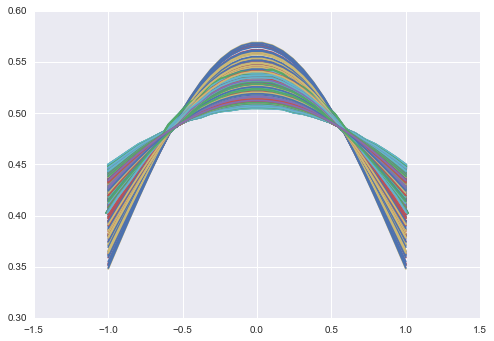

In [165]:
plt.figure()
for i in range(len(X_test)):
    plt.plot(X_test[i][0:30], X_test[i][30:60])
    plt.plot(representations[i][0:30], representations[i][30:60])
plt.show()

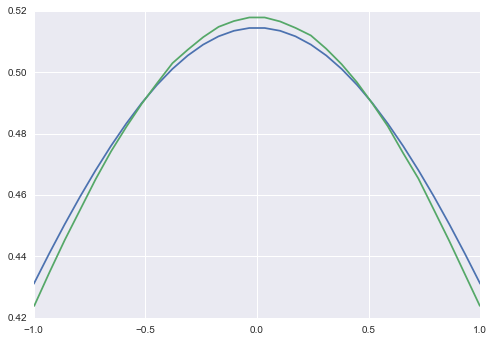

In [166]:
plt.figure()
plt.plot(X_test[1][0:30], X_test[1][30:60])
plt.plot(representations[1][0:30], representations[1][30:60])
plt.show()